### 보험료 예측
> https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction

#### Features
1. age - 나이
2. sex - 성별
3. bmi - bmi
4. children - 자식 수
5. smoker - 습연 여부
6. region - 지역
7. expense - 금액(target)

In [1]:
import pandas as pd

i_df_origin = pd.read_csv('./datasets/insurance.csv')
i_df = i_df_origin.copy()
i_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [2]:
i_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- 결측치 확인

In [3]:
i_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

- 중복행 확인

In [4]:
i_df.duplicated().sum()

1

- 중복행 제거

In [5]:
i_df = i_df.drop_duplicates()

In [6]:
i_df.duplicated().sum()

0

In [7]:
i_df.children.value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [8]:
i_df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [9]:
i_df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [10]:
i_df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [11]:
pre_i_df = i_df.loc[:, ['age', 'bmi', 'children', 'expenses']]
pre_i_df

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'expenses'}>]], dtype=object)

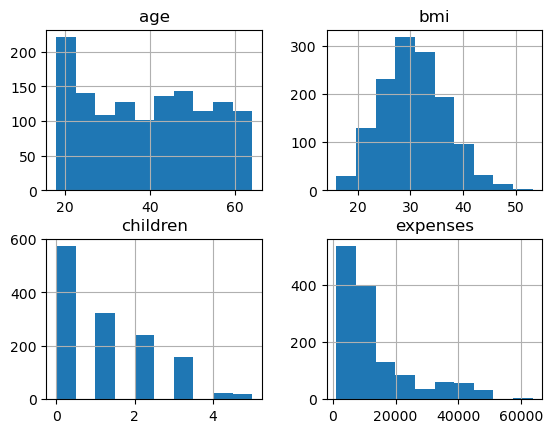

In [12]:
pre_i_df.hist()

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

- LinearRegression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_i_df.iloc[:, :-1], pre_i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [15]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 139834077.0931, RMSE: 11825.1460, MSLE: 0.7987, RMSLE: 0.8937, R2: 0.1234


- PolynomialFeatures

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_i_df.iloc[:, :-1], pre_i_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [17]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 140795243.3328, RMSE: 11865.7171, MSLE: 0.8100, RMSLE: 0.9000, R2: 0.1174


#### R2스코어가 0.1정도밖에 되지 않아 우선 타겟데이터의 분포가 맞지 않는것을 확인하여서 타겟데이터 로그변환

In [18]:
import numpy as np

pre_i_df.loc[:, 'expenses'] = np.log1p(pre_i_df.expenses)

<Axes: >

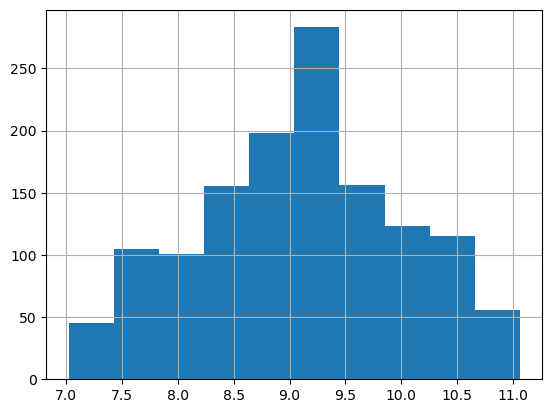

In [19]:
pre_i_df.expenses.hist()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_i_df.iloc[:, :-1], pre_i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [21]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.6149, RMSE: 0.7842, MSLE: 0.0060, RMSLE: 0.0772, R2: 0.2998


In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_i_df.iloc[:, :-1], pre_i_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [23]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.6213, RMSE: 0.7882, MSLE: 0.0060, RMSLE: 0.0775, R2: 0.2926


- 타겟데이터 분포를 조금 맞추고 나니 LinearRegression의 R2가 거의 0.3에 가까워졌다

#### 범주형 데이터 추가

In [24]:
i_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


- 범주형 데이터 레이블 인코딩

In [25]:
from sklearn.preprocessing import LabelEncoder

columns = ['sex', 'children', 'smoker', 'region']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    i_df[column] = encoder.fit_transform(i_df[column])
    encoders[column] = encoder.classes_.tolist()

C:\Users\user\AppData\Local\Temp\ipykernel_2760\944286122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df[column] = encoder.fit_transform(i_df[column])
C:\Users\user\AppData\Local\Temp\ipykernel_2760\944286122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df[column] = encoder.fit_transform(i_df[column])
C:\Users\user\AppData\Local\Temp\ipykernel_2760\944286122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'expenses'}>, <Axes: >, <Axes: >]],
      dtype=object)

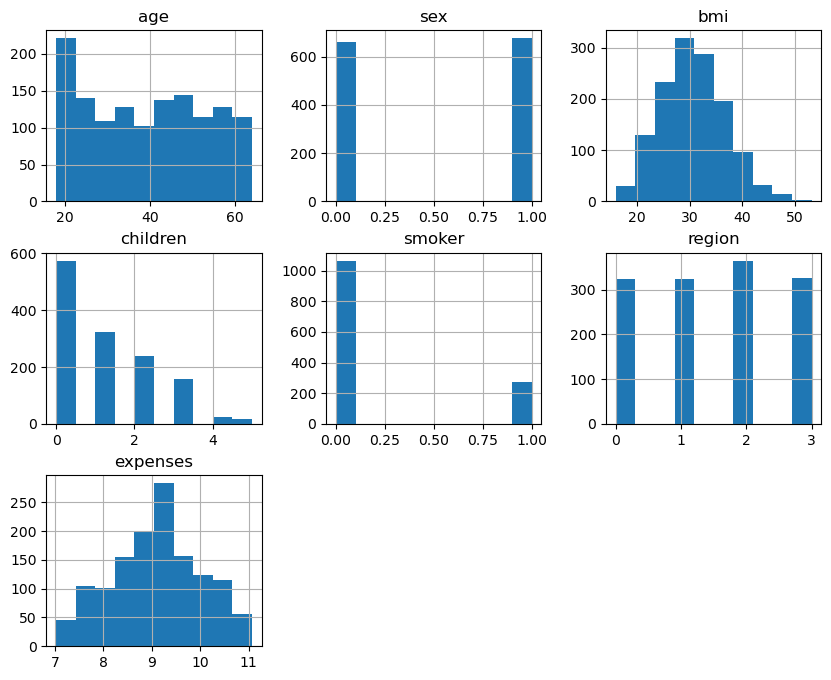

In [26]:
import numpy as np

i_df.loc[:, 'expenses'] = np.log1p(i_df.expenses)
i_df.hist(figsize=(10, 8))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [28]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.2047, RMSE: 0.4525, MSLE: 0.0020, RMSLE: 0.0448, R2: 0.7669


In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [30]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.1477, RMSE: 0.3843, MSLE: 0.0015, RMSLE: 0.0383, R2: 0.8318


- 범주형 데이터를 추가하였더니 R2스코어가 많이 올랐다

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [32]:
from statsmodels.api import OLS

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:               expenses   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          1.075e+04
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        10:47:39   Log-Likelihood:                         -2248.2
No. Observations:                1337   AIC:                                      4508.
Df Residuals:                    1331   BIC:                                      4540.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
get_vif(features)

,vif_score,feature
0,7.558648,age
1,2.000026,sex
2,10.378835,bmi
3,1.801974,children
4,1.257158,smoker
5,2.924066,region


- OLS와 VIF또한 양호하다

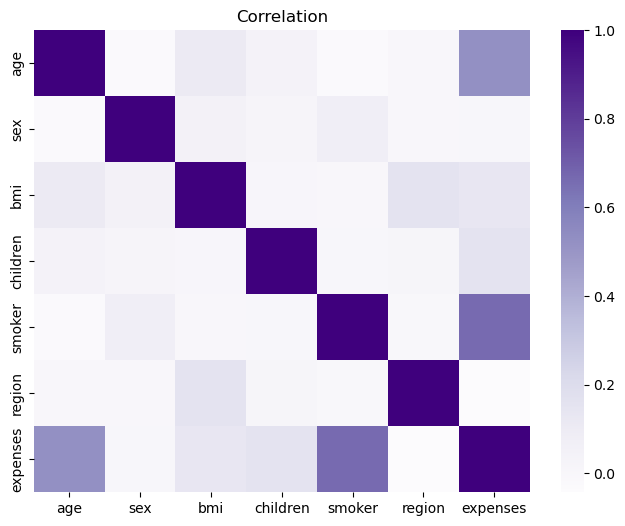

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
corr = i_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [35]:
corr['expenses'].sort_values(ascending=False)[1:]

smoker      0.665751
age         0.526900
children    0.160316
bmi         0.132951
sex         0.007022
region     -0.043386
Name: expenses, dtype: float64

In [36]:
corr

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.019814,0.109414,0.041536,-0.025587,0.001626,0.526900
sex,-0.019814,1.000000,0.046405,0.017848,0.076596,0.004936,0.007022
bmi,0.109414,0.046405,1.000000,0.012641,0.003964,0.157448,0.132951
children,0.041536,0.017848,0.012641,1.000000,0.007331,0.016258,0.160316
smoker,-0.025587,0.076596,0.003964,0.007331,1.000000,-0.002358,0.665751
region,0.001626,0.004936,0.157448,0.016258,-0.002358,1.000000,-0.043386
expenses,0.526900,0.007022,0.132951,0.160316,0.665751,-0.043386,1.000000


- 타겟과의 상관관계가 낮은 피쳐들이 많지만 결과가 잘 나와서 보류

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [38]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.2047, RMSE: 0.4525, MSLE: 0.0020, RMSLE: 0.0448, R2: 0.7669


In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

# cross_val_score로 교차검증(cross_val_score이 알아서 데이터를 분리하여서 교차검증을 해준다)
score = cross_val_score(l_r, X_train, y_train, cv=5, scoring='r2')
print('r2:', np.round(np.mean(score), 5))

r2: 0.7591


- LinearRegression과 교차검증 후 R2스코어가 거의 비슷하게 0.75가 나왔다

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.2885, RMSE: 0.5371, MSLE: 0.0029, RMSLE: 0.0539, R2: 0.6715
RandomForestRegressor
MSE: 0.1723, RMSE: 0.4151, MSLE: 0.0018, RMSLE: 0.0420, R2: 0.8038
GradientBoostingRegressor
MSE: 0.1537, RMSE: 0.3920, MSLE: 0.0015, RMSLE: 0.0393, R2: 0.8250
XGBRegressor
MSE: 0.2066, RMSE: 0.4545, MSLE: 0.0021, RMSLE: 0.0460, R2: 0.7648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 6
[LightGBM] [Info] Start training from score 9.104222
LGBMRegressor
MSE: 0.1658, RMSE: 0.4072, MSLE: 0.0017, RMSLE: 0.0411, R2: 0.8112


### 검증

In [41]:
features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=124)

l_r = LinearRegression()

#### train

In [42]:
l_r.fit(X_train, y_train)

prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

MSE: 0.1949, RMSE: 0.4415, MSLE: 0.0019, RMSLE: 0.0437, R2: 0.7664


#### test

In [43]:
l_r.fit(X_train, y_train)

prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.2047, RMSE: 0.4525, MSLE: 0.0020, RMSLE: 0.0448, R2: 0.7669


#### validation

In [44]:
l_r.fit(X_train_val, y_train_val)

prediction = l_r.predict(X_test_val)
get_evaluation(y_test_val, prediction)

MSE: 0.1590, RMSE: 0.3987, MSLE: 0.0016, RMSLE: 0.0399, R2: 0.8076


#### kfold

In [45]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=124)

score = cross_val_score(l_r, X_train, y_train, cv=kfold, scoring='r2')
print(score)
print(np.round(np.mean(score), 4))

[0.80620988 0.81172762 0.78619599 0.75287397 0.81641057 0.76944972
 0.79899546 0.63683814 0.7037099  0.72692468]
0.7609


MSE: 0.1949, RMSE: 0.4415, MSLE: 0.0019, RMSLE: 0.0437, R2: 0.7664


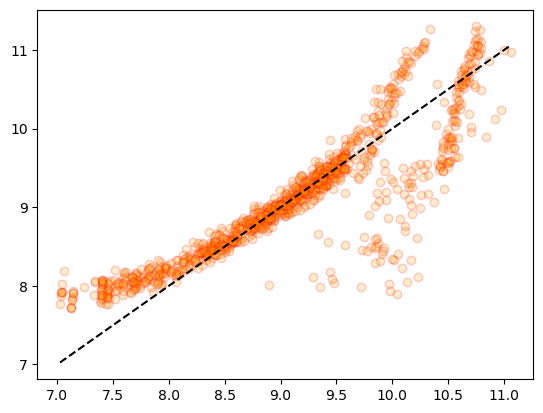

In [46]:
import matplotlib.pyplot as plt

l_r = LinearRegression()

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 0.2047, RMSE: 0.4525, MSLE: 0.0020, RMSLE: 0.0448, R2: 0.7669


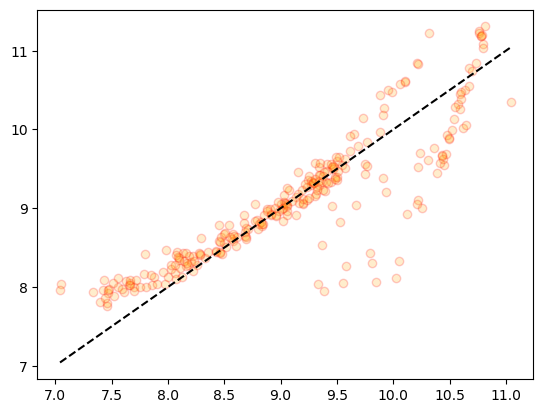

In [47]:
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [48]:
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

X_train_val, X_test_val, y_train_val, y_test_val =\
    train_test_split(X_train, y_train, test_size=0.2, random_state=124)

X_train_val = torch.FloatTensor(X_train_val.values)
y_train_val = torch.FloatTensor(y_train_val.values).view(-1, 1)

X_test_val = torch.FloatTensor(X_test_val.values)
y_test_val = torch.FloatTensor(y_test_val.values).view(-1, 1)

train_losses = []
val_losses = []

# W_train = torch.nn.Parameter(torch.FloatTensor(l_r.coef_))
# b_train = torch.nn.Parameter(torch.tensor(l_r.intercept_))
W_train = torch.zeros((6, 1), requires_grad=True)
b_train = torch.zeros(1, requires_grad=True)

W_val = torch.zeros((6, 1), requires_grad=True)
b_val = torch.zeros(1, requires_grad=True)

optimizer_train = SGD([W_train, b_train], lr=0.00019)
optimizer_val = SGD([W_val, b_val], lr=0.00019)

In [49]:
# 검증 데이터를 포함하지 않는 훈련 데이터 세트 학습 수행
epochs = 300000

for epoch in range(1, epochs + 1):
    H_train = X_train_val.matmul(W_train) + b_train
    loss_train = torch.mean((y_train_val - H_train) ** 2)

    optimizer_train.zero_grad()
    loss_train.backward()
    optimizer_train.step()

    if epoch % 100 == 0:
        train_losses.append(loss_train.item())

    if epoch % 10000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, b: {:.4f}, loss: {:.4f}'\
            .format(epoch, epochs, W_train[0].item(), W_train[1].item(), \
                    W_train[2].item(), W_train[3].item(), b_train.item(), loss_train.item()))

10000/300000: W1: 0.0646, W2: 0.2745, W3: 0.1642, W4: 0.2223, b: 0.7397, loss: 1.4007
20000/300000: W1: 0.0615, W2: 0.3239, W3: 0.1461, W4: 0.2025, b: 1.3692, loss: 1.0909
30000/300000: W1: 0.0589, W2: 0.3072, W3: 0.1318, W4: 0.1879, b: 1.9256, loss: 0.9019
40000/300000: W1: 0.0565, W2: 0.2741, W3: 0.1197, W4: 0.1766, b: 2.4222, loss: 0.7649
50000/300000: W1: 0.0544, W2: 0.2403, W3: 0.1091, W4: 0.1674, b: 2.8677, loss: 0.6583
60000/300000: W1: 0.0525, W2: 0.2096, W3: 0.0997, W4: 0.1595, b: 3.2683, loss: 0.5729
70000/300000: W1: 0.0508, W2: 0.1826, W3: 0.0914, W4: 0.1526, b: 3.6290, loss: 0.5039
80000/300000: W1: 0.0493, W2: 0.1589, W3: 0.0839, W4: 0.1464, b: 3.9541, loss: 0.4479
90000/300000: W1: 0.0479, W2: 0.1380, W3: 0.0771, W4: 0.1410, b: 4.2470, loss: 0.4023
100000/300000: W1: 0.0466, W2: 0.1194, W3: 0.0711, W4: 0.1361, b: 4.5111, loss: 0.3653
110000/300000: W1: 0.0455, W2: 0.1028, W3: 0.0656, W4: 0.1317, b: 4.7492, loss: 0.3353
120000/300000: W1: 0.0445, W2: 0.0880, W3: 0.0607, W

In [50]:
# 검증 데이터 세트 학습 수행
epochs = 300000

for epoch in range(1, epochs + 1):
    H_test = X_test_val.matmul(W_val) + b_val
    loss_test = torch.mean((y_test_val - H_test) ** 2)

    optimizer_val.zero_grad()
    loss_test.backward()
    optimizer_val.step()

    if epoch % 100 == 0:
        val_losses.append(loss_test.item())
        
    if epoch % 10000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, b: {:.4f}, loss: {:.4f}'\
            .format(epoch, epochs, W_val[0].item(), W_val[1].item(), \
                    W_val[2].item(), W_val[3].item(), b_val.item(), loss_test.item()))

10000/300000: W1: 0.0682, W2: 0.0531, W3: 0.1599, W4: 0.2690, b: 0.8777, loss: 1.5874
20000/300000: W1: 0.0637, W2: 0.0341, W3: 0.1397, W4: 0.2593, b: 1.6292, loss: 1.1910
30000/300000: W1: 0.0599, W2: 0.0042, W3: 0.1231, W4: 0.2478, b: 2.2860, loss: 0.9368
40000/300000: W1: 0.0567, W2: -0.0224, W3: 0.1091, W4: 0.2359, b: 2.8621, loss: 0.7546
50000/300000: W1: 0.0540, W2: -0.0435, W3: 0.0970, W4: 0.2245, b: 3.3682, loss: 0.6177
60000/300000: W1: 0.0516, W2: -0.0597, W3: 0.0865, W4: 0.2139, b: 3.8134, loss: 0.5126
70000/300000: W1: 0.0495, W2: -0.0722, W3: 0.0773, W4: 0.2043, b: 4.2052, loss: 0.4315
80000/300000: W1: 0.0477, W2: -0.0822, W3: 0.0692, W4: 0.1957, b: 4.5503, loss: 0.3686
90000/300000: W1: 0.0461, W2: -0.0903, W3: 0.0621, W4: 0.1880, b: 4.8542, loss: 0.3198
100000/300000: W1: 0.0447, W2: -0.0970, W3: 0.0559, W4: 0.1812, b: 5.1219, loss: 0.2820
110000/300000: W1: 0.0435, W2: -0.1028, W3: 0.0504, W4: 0.1752, b: 5.3577, loss: 0.2526
120000/300000: W1: 0.0424, W2: -0.1077, W3: 

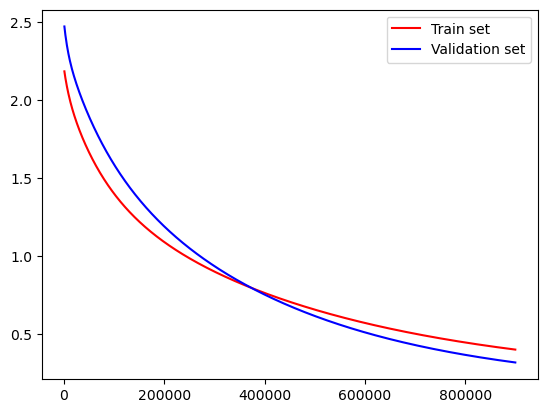

In [51]:
import matplotlib.pyplot as plt

train_loss_dict = dict()
val_loss_dict = dict()

for i in range(900):
    train_loss_dict[(i+1)*1000] = train_losses[i]
    val_loss_dict[(i+1)*1000] = val_losses[i]

plt.plot(train_loss_dict.keys(), train_loss_dict.values(), color='r', label='Train set')
plt.plot(val_loss_dict.keys(), val_loss_dict.values(), color='b', label='Validation set')
plt.legend()
plt.show()

### 결론
- LinearRegression모델 사용 결과 R2스코어 0.7669로 아주 양호했고 LinearRegression모델을 교차검증 후 R2스코어 0.7591로 0.007정도 차이가 났으며,  
  Polynomial과 트리, 부스팅등 결과가 비슷하게 0.7~0.8정도로 나타났고 OLS및 VIF 확인 결과 모두 양호한 수치를 보이며,  
  Train과 Test데이터를 각각 시각화 및 각종 스코어를 보았을 때에도 모든 수치가 큰 차이가 없었다.
- 원본 데이터와 검증데이터를 사용한 훈련에서 결과가 원본데이터 R2: 0.7669, 검증데이터 R2: 0.8076으로 검증 후 R2가 더 높게 나왔다
- 따라서 해당 데이터세트는 선형적이며, 과적합도 발생하지 않은것으로 판단되고, VIF스코어 또한 양호하다.  
  최종적으로 LinearRegression모델로 테스트 결과 MSE: 0.2047, RMSE: 0.4525, MSLE: 0.0020, RMSLE: 0.0448, R2: 0.7669로 괜찮은 모델이라고 판단된다.

In [52]:
bt_i_df = i_df[i_df.expenses.between(9.5, 10.5)]
bt_i_df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,9.734235
3,33,1,22.7,0,0,1,9.998137
9,60,0,25.8,0,0,1,10.272432
11,62,0,26.3,0,1,2,10.233141
25,59,0,27.7,3,0,2,9.546965
...,...,...,...,...,...,...,...
1314,30,0,23.7,3,1,1,9.839849
1318,35,1,39.7,4,0,0,9.878053
1321,62,1,26.7,0,1,0,10.243608
1328,23,0,24.2,2,0,0,10.016671


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'expenses'}>, <Axes: >, <Axes: >]],
      dtype=object)

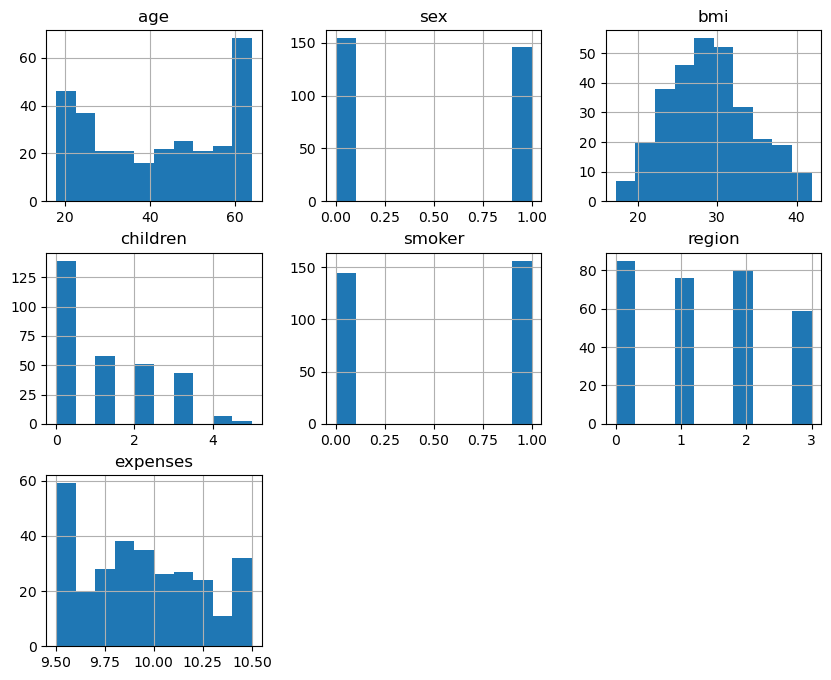

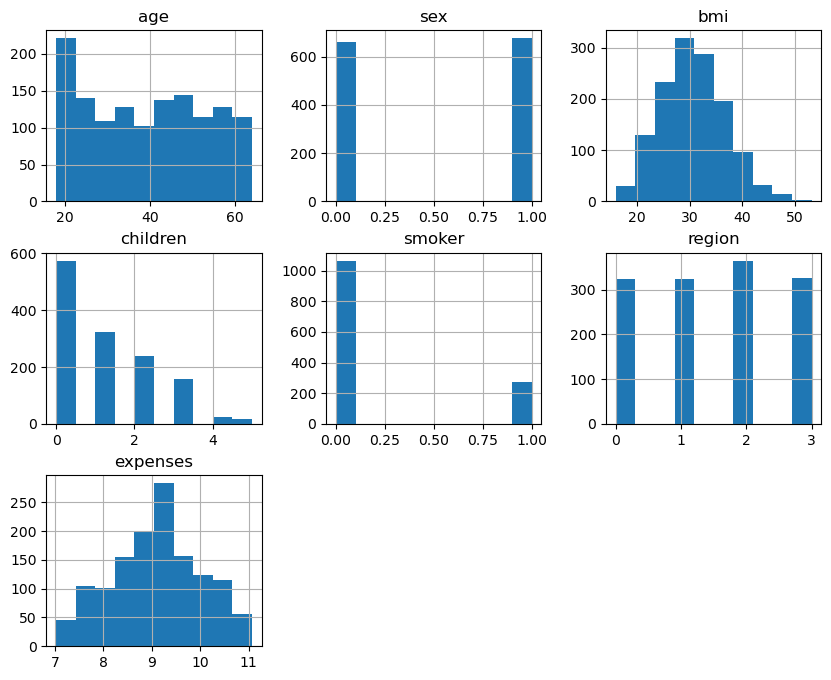

In [53]:
bt_i_df.hist(figsize=(10, 8))
i_df.hist(figsize=(10, 8))

In [54]:
i_df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.019814,0.109414,0.041536,-0.025587,0.001626,0.526900
sex,-0.019814,1.000000,0.046405,0.017848,0.076596,0.004936,0.007022
bmi,0.109414,0.046405,1.000000,0.012641,0.003964,0.157448,0.132951
children,0.041536,0.017848,0.012641,1.000000,0.007331,0.016258,0.160316
smoker,-0.025587,0.076596,0.003964,0.007331,1.000000,-0.002358,0.665751
region,0.001626,0.004936,0.157448,0.016258,-0.002358,1.000000,-0.043386
expenses,0.526900,0.007022,0.132951,0.160316,0.665751,-0.043386,1.000000


In [55]:
test_df = i_df.drop(labels=['sex', 'region', 'bmi'], axis=1)
test_df

,age,children,smoker,expenses
0,19,0,1,9.734235
1,18,1,0,7.453880
2,28,3,0,8.400763
3,33,0,0,9.998137
4,32,0,0,8.260457
...,...,...,...,...
1333,50,3,0,9.268755
1334,18,0,0,7.699380
1335,18,0,0,7.396844
1336,21,0,0,7.605367


In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

features, targets = test_df.iloc[:, :-1], test_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

score = cross_val_score(l_r, X_train, y_train, cv=5, scoring='r2')
print('r2:', np.round(np.mean(score), 5))

r2: 0.75036


MSE: 0.2038, RMSE: 0.4514, MSLE: 0.0020, RMSLE: 0.0446, R2: 0.7557


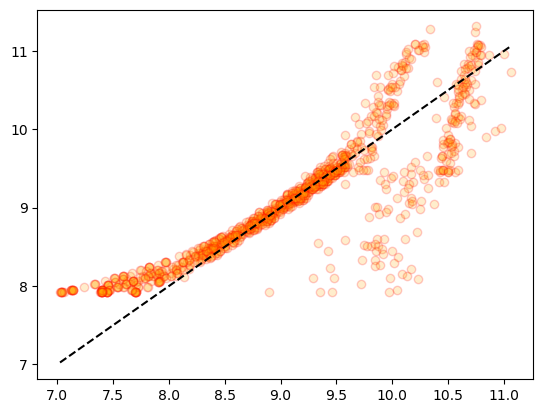

In [57]:
import matplotlib.pyplot as plt

l_r = LinearRegression()

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 0.2099, RMSE: 0.4582, MSLE: 0.0021, RMSLE: 0.0453, R2: 0.7610


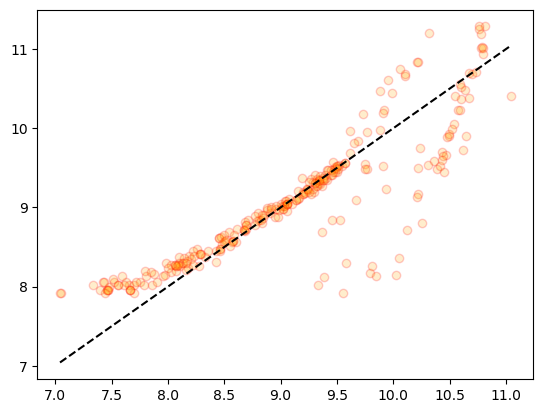

In [58]:
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [59]:
bt_df = i_df[i_df.expenses.between(8, 9.5)]
bt_df

,age,sex,bmi,children,smoker,region,expenses
2,28,1,33.0,3,0,2,8.400763
4,32,1,28.9,0,0,1,8.260457
5,31,0,25.7,0,0,2,8.231541
6,46,0,33.4,1,0,2,9.016949
7,37,0,27.7,3,0,1,8.893231
...,...,...,...,...,...,...,...
1329,52,1,38.6,2,0,3,9.242441
1330,57,0,25.7,2,0,2,9.443844
1331,23,0,33.4,0,0,3,9.287018
1332,52,0,44.7,3,0,3,9.342481


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'expenses'}>, <Axes: >, <Axes: >]],
      dtype=object)

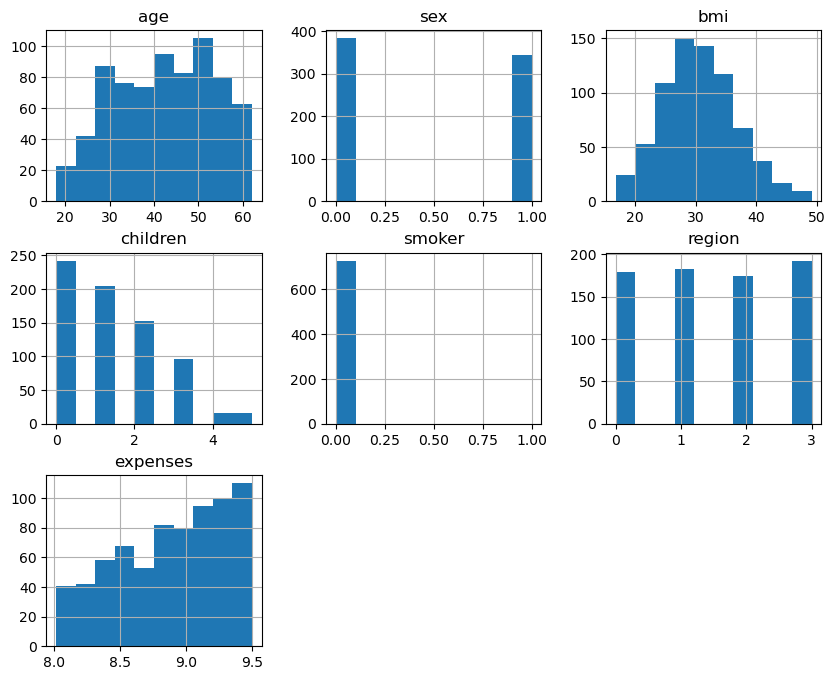

In [60]:
bt_df.hist(figsize=(10, 8))

In [61]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

features, targets = bt_df.iloc[:, :-1], bt_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

score = cross_val_score(l_r, X_train, y_train, cv=5, scoring='r2')
print('r2:', np.round(np.mean(score), 5))

r2: 0.8389


MSE: 0.0229, RMSE: 0.1515, MSLE: 0.0002, RMSLE: 0.0156, R2: 0.8654


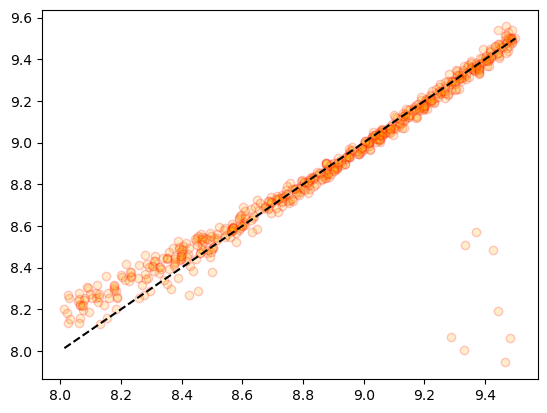

In [62]:
import matplotlib.pyplot as plt

l_r = LinearRegression()

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 0.0377, RMSE: 0.1942, MSLE: 0.0004, RMSLE: 0.0202, R2: 0.7616


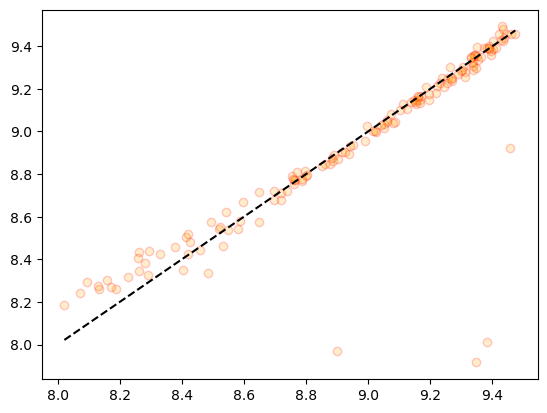

In [63]:
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [64]:
i_df.smoker.value_counts()

smoker
0    1063
1     274
Name: count, dtype: int64

In [65]:
neg = i_df[i_df.smoker == 0].sample(274, random_state=124)
pos = i_df[i_df.smoker == 1]

pre_i_df = pd.concat([neg, pos])
pre_i_df.reset_index(drop=True, inplace=True)
pre_i_df

,age,sex,bmi,children,smoker,region,expenses
0,57,1,28.1,0,0,3,9.302596
1,28,1,30.9,0,0,1,8.027317
2,58,0,39.1,0,0,2,9.380708
3,60,1,24.3,1,0,1,9.481405
4,23,1,32.7,3,0,3,8.186598
...,...,...,...,...,...,...,...
543,19,0,34.7,2,1,3,10.502285
544,30,0,23.7,3,1,1,9.839849
545,62,1,26.7,0,1,0,10.243608
546,42,0,40.4,2,1,2,10.689610


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'expenses'}>, <Axes: >, <Axes: >]],
      dtype=object)

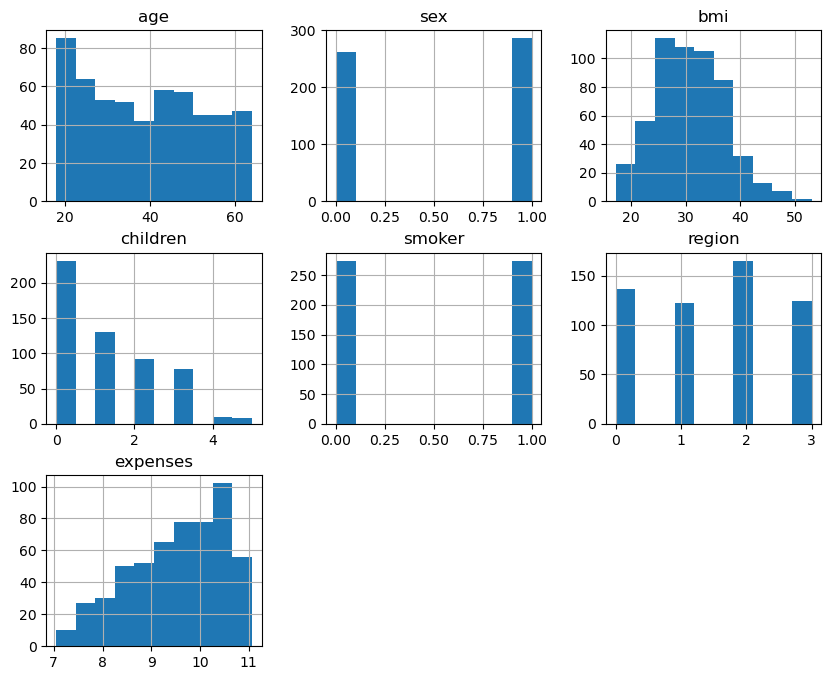

In [66]:
pre_i_df.hist(figsize=(10, 8))

In [67]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

features, targets = pre_i_df.iloc[:, :-1], pre_i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

score = cross_val_score(l_r, X_train, y_train, cv=5, scoring='r2')
print('r2:', np.round(np.mean(score), 5))

r2: 0.83926


MSE: 0.1477, RMSE: 0.3843, MSLE: 0.0014, RMSLE: 0.0379, R2: 0.8437


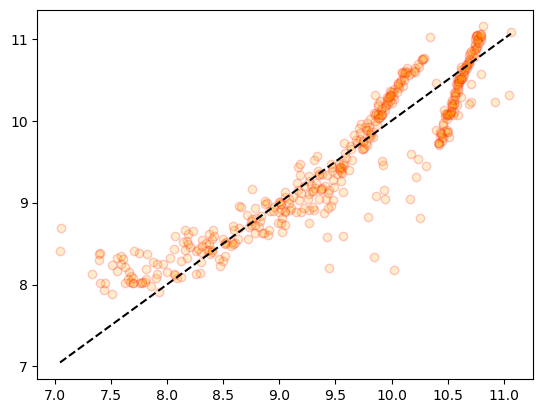

In [68]:
import matplotlib.pyplot as plt

l_r = LinearRegression()

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 0.1476, RMSE: 0.3842, MSLE: 0.0014, RMSLE: 0.0369, R2: 0.8193


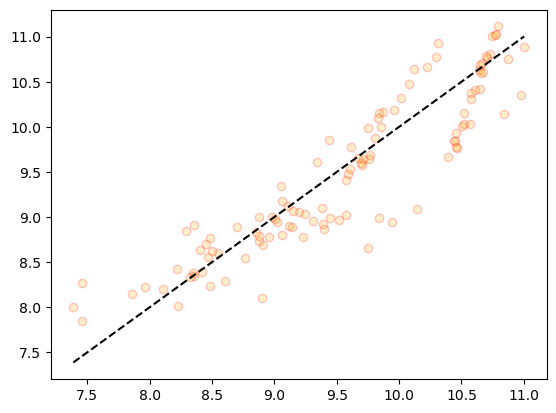

In [69]:
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [70]:
pre_i_df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.046653,0.130778,0.054365,-0.021363,0.026621,0.366445
sex,-0.046653,1.000000,0.129040,0.039503,0.116900,-0.000146,0.079785
bmi,0.130778,0.129040,1.000000,0.023596,-0.023998,0.175361,0.201407
children,0.054365,0.039503,0.023596,1.000000,-0.020715,0.033359,0.100516
smoker,-0.021363,0.116900,-0.023998,-0.020715,1.000000,0.006656,0.808176
region,0.026621,-0.000146,0.175361,0.033359,0.006656,1.000000,0.028707
expenses,0.366445,0.079785,0.201407,0.100516,0.808176,0.028707,1.000000


In [71]:
get_vif(features)

,vif_score,feature
0,7.759050,age
1,2.162131,sex
2,11.166169,bmi
3,1.837451,children
4,1.955569,smoker
5,2.955544,region


In [72]:
from statsmodels.api import OLS

features, targets = pre_i_df.iloc[:, :-1], pre_i_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:               expenses   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              5045.
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        10:50:31   Log-Likelihood:                         -908.68
No. Observations:                 548   AIC:                                      1829.
Df Residuals:                     542   BIC:                                      1855.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [73]:
pre_i_df.drop(labels=['sex'], axis=1, inplace=True)

In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

features, targets = pre_i_df.iloc[:, :-1], pre_i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

score = cross_val_score(l_r, X_train, y_train, cv=5, scoring='r2')
print('r2:', np.round(np.mean(score), 5))

r2: 0.83912


MSE: 0.1486, RMSE: 0.3855, MSLE: 0.0014, RMSLE: 0.0381, R2: 0.8428


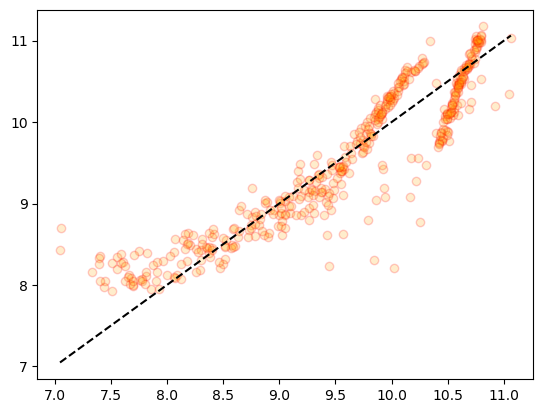

In [75]:
import matplotlib.pyplot as plt

l_r = LinearRegression()

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 0.1471, RMSE: 0.3836, MSLE: 0.0014, RMSLE: 0.0369, R2: 0.8198


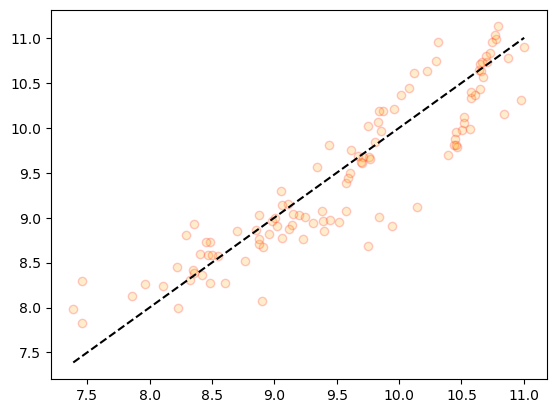

In [76]:
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()